# Numerical construction of MPO

In [1]:
import numpy as np
import sympy

from pympo import (
    AssignManager,
    OpSite,
    SumOfProducts,
)

In [2]:
HenonHeiles = SumOfProducts([])
omega = sympy.Symbol("omega")
lam = sympy.Symbol("lambda")
ndim = 4

ints_p2 = np.ones((3, 3))
ints_q = np.ones((3,))
ints_q2 = np.ones((3,))
ints_q3 = np.ones((3,))

p2_ops = [OpSite(r"\hat{p}^2" + f"_{i}", i, value=ints_p2) for i in range(ndim)]
q2_ops = [OpSite(r"\hat{q}^2" + f"_{i}", i, value=ints_q2) for i in range(ndim)]
q_ops = [OpSite(r"\hat{q}" + f"_{i}", i, value=ints_q) for i in range(ndim)]
q3_ops = [OpSite(r"\hat{q}^3" + f"_{i}", i, value=ints_q3) for i in range(ndim)]
for i in range(ndim):
    HenonHeiles += p2_ops[i] * (omega / 2)
    HenonHeiles += q2_ops[i] * (omega / 2)
    pass
for i in range(ndim - 1):
    HenonHeiles += q2_ops[i] * q_ops[i + 1] * lam
    HenonHeiles -= q3_ops[i + 1] * (lam / 3)
    pass
print(f"{HenonHeiles.ndim=}, {HenonHeiles.nops=}")
display(HenonHeiles.symbol)

HenonHeiles.ndim=4, HenonHeiles.nops=14


\hat{p}^2_0*omega/2 + \hat{p}^2_1*omega/2 + \hat{p}^2_2*omega/2 + \hat{p}^2_3*omega/2 + \hat{q}^2_0*\hat{q}_1*lambda + \hat{q}^2_0*omega/2 + \hat{q}^2_1*\hat{q}_2*lambda + \hat{q}^2_1*omega/2 + \hat{q}^2_2*\hat{q}_3*lambda + \hat{q}^2_2*omega/2 + \hat{q}^2_3*omega/2 - \hat{q}^3_1*lambda/3 - \hat{q}^3_2*lambda/3 - \hat{q}^3_3*lambda/3

In [3]:
am = AssignManager(HenonHeiles)
display(*am.Wsym)

Matrix([[\hat{p}^2_0, \hat{q}^2_0, 1, 1, 1, 1, 1, 1, \hat{q}^2_0, 1, 1, 1, 1, 1]])

Matrix([
[1, 0,           0,           0, 0, 0, 0, 0,         0,           0,           0, 0, 0, 0],
[0, 1,           0,           0, 0, 0, 0, 0,         0,           0,           0, 0, 0, 0],
[0, 0, \hat{p}^2_1,           0, 0, 0, 0, 0,         0,           0,           0, 0, 0, 0],
[0, 0,           0, \hat{q}^2_1, 0, 0, 0, 0,         0,           0,           0, 0, 0, 0],
[0, 0,           0,           0, 1, 0, 0, 0,         0,           0,           0, 0, 0, 0],
[0, 0,           0,           0, 0, 1, 0, 0,         0,           0,           0, 0, 0, 0],
[0, 0,           0,           0, 0, 0, 1, 0,         0,           0,           0, 0, 0, 0],
[0, 0,           0,           0, 0, 0, 0, 1,         0,           0,           0, 0, 0, 0],
[0, 0,           0,           0, 0, 0, 0, 0, \hat{q}_1,           0,           0, 0, 0, 0],
[0, 0,           0,           0, 0, 0, 0, 0,         0, \hat{q}^3_1,           0, 0, 0, 0],
[0, 0,           0,           0, 0, 0, 0, 0,         0,           0, \h

Matrix([
[1, 0, 0, 0,           0,           0, 0, 0, 0, 0,         0,           0,           0, 0],
[0, 1, 0, 0,           0,           0, 0, 0, 0, 0,         0,           0,           0, 0],
[0, 0, 1, 0,           0,           0, 0, 0, 0, 0,         0,           0,           0, 0],
[0, 0, 0, 1,           0,           0, 0, 0, 0, 0,         0,           0,           0, 0],
[0, 0, 0, 0, \hat{p}^2_2,           0, 0, 0, 0, 0,         0,           0,           0, 0],
[0, 0, 0, 0,           0, \hat{q}^2_2, 0, 0, 0, 0,         0,           0,           0, 0],
[0, 0, 0, 0,           0,           0, 1, 0, 0, 0,         0,           0,           0, 0],
[0, 0, 0, 0,           0,           0, 0, 1, 0, 0,         0,           0,           0, 0],
[0, 0, 0, 0,           0,           0, 0, 0, 1, 0,         0,           0,           0, 0],
[0, 0, 0, 0,           0,           0, 0, 0, 0, 1,         0,           0,           0, 0],
[0, 0, 0, 0,           0,           0, 0, 0, 0, 0, \hat{q}_2,          

Matrix([
[              omega/2],
[              omega/2],
[              omega/2],
[              omega/2],
[              omega/2],
[              omega/2],
[  \hat{p}^2_3*omega/2],
[  \hat{q}^2_3*omega/2],
[               lambda],
[            -lambda/3],
[               lambda],
[            -lambda/3],
[     \hat{q}_3*lambda],
[-\hat{q}^3_3*lambda/3]])

In [4]:
am.assign()
display(*am.Wsym)

2024-11-18 19:50:35.221 | INFO     | pympo.bipartite:assign:218 - assigned isite=0/4
2024-11-18 19:50:35.223 | INFO     | pympo.bipartite:assign:218 - assigned isite=1/4
2024-11-18 19:50:35.225 | INFO     | pympo.bipartite:assign:218 - assigned isite=2/4
2024-11-18 19:50:35.227 | INFO     | pympo.bipartite:assign:218 - assigned isite=3/4


Matrix([[1, \hat{p}^2_0*omega/2 + \hat{q}^2_0*omega/2, \hat{q}^2_0*lambda]])

Matrix([
[1, \hat{q}^2_1, \hat{p}^2_1*omega/2 - \hat{q}^3_1*lambda/3],
[0,           0,                                          1],
[0,           0,                                  \hat{q}_1]])

Matrix([
[1, \hat{p}^2_2*omega/2 + \hat{q}^2_2*omega/2 - \hat{q}^3_2*lambda/3, \hat{q}^2_2],
[0,                                       \hat{q}_2*lambda + omega/2,           0],
[0,                                                                1,           0]])

Matrix([
[\hat{p}^2_3*omega/2 + \hat{q}^2_3*omega/2 - \hat{q}^3_3*lambda/3],
[                                                               1],
[                                                \hat{q}_3*lambda]])

In [5]:
W_prod = sympy.Mul(*am.Wsym)
print(*[f"W{i}" for i in range(am.ndim)], "=")
display(W_prod[0].expand())

W0 W1 W2 W3 =


\hat{p}^2_0*omega/2 + \hat{p}^2_1*omega/2 + \hat{p}^2_2*omega/2 + \hat{p}^2_3*omega/2 + \hat{q}^2_0*\hat{q}_1*lambda + \hat{q}^2_0*omega/2 + \hat{q}^2_1*\hat{q}_2*lambda + \hat{q}^2_1*omega/2 + \hat{q}^2_2*\hat{q}_3*lambda + \hat{q}^2_2*omega/2 + \hat{q}^2_3*omega/2 - \hat{q}^3_1*lambda/3 - \hat{q}^3_2*lambda/3 - \hat{q}^3_3*lambda/3

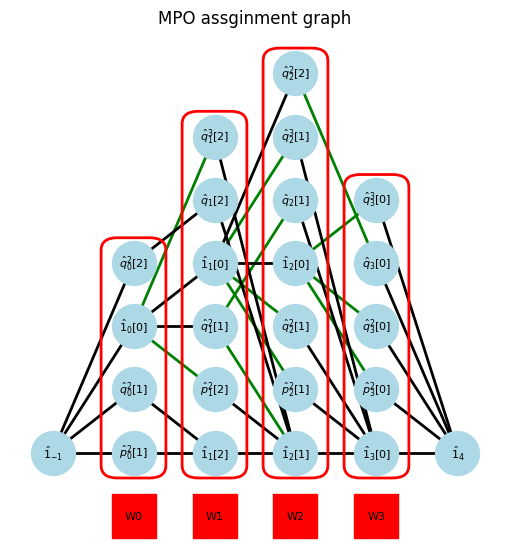

In [6]:
am.show_graph()

In [7]:
mpo = am.numerical_mpo(
    subs={omega: 2.0, lam: 1.0}
)  # subs is not necessary if you define its value in advance.
mpo

[array([[[[1.+0.j, 2.+0.j, 1.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j]],
 
         [[0.+0.j, 1.+0.j, 0.+0.j],
          [1.+0.j, 2.+0.j, 1.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j]],
 
         [[0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j],
          [1.+0.j, 2.+0.j, 1.+0.j]]]]),
 array([[[[1.        +0.j, 1.        +0.j, 0.66666667+0.j],
          [0.        +0.j, 0.        +0.j, 1.        +0.j],
          [0.        +0.j, 0.        +0.j, 1.        +0.j]],
 
         [[0.        +0.j, 0.        +0.j, 1.        +0.j],
          [1.        +0.j, 1.        +0.j, 0.66666667+0.j],
          [0.        +0.j, 0.        +0.j, 1.        +0.j]],
 
         [[0.        +0.j, 0.        +0.j, 1.        +0.j],
          [0.        +0.j, 0.        +0.j, 1.        +0.j],
          [1.        +0.j, 1.        +0.j, 0.66666667+0.j]]],
 
 
        [[[0.        +0.j, 0.        +0.j, 1.        +0.j],
          [0.        +0.j, 0.        +0.j, 0.        +

In [8]:
dump = None
for core in mpo:
    if dump is None:
        dump = core[0, 0, 0, :]
    else:
        dump = np.einsum("i,ij->j", dump, core[:, 0, 0, :])